In [11]:
from tensorflow.keras.models import load_model\

model = load_model('gru_model/model_toptag_gru.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (GRU)                (None, 20)                1680      
                                                                 
 layer3 (Dense)              (None, 64)                1344      
                                                                 
 output_sigmoid (Dense)      (None, 1)                 65        
                                                                 
Total params: 3,089
Trainable params: 3,089
Non-trainable params: 0
_________________________________________________________________


In [6]:
import hls4ml
import os
os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']

In [12]:
def print_dict(d, indent=0):
    for key, value in d.items():
        print('  ' * indent + str(key), end='')
        if isinstance(value, dict):
            print()
            print_dict(value, indent + 1)
        else:
            print(':' + ' ' * (20 - len(key) - 2 * indent) + str(value))

config = hls4ml.utils.config_from_keras_model(model, granularity='model', default_precision='ap_fixed<18,8>')
config['Model']['ReuseFactor'] = 1
config['Model']['Strategy']='Resource'
print("-----------------------------------")
print_dict(config)
print("-----------------------------------")


hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='hls/toptagging_gru_hls4ml_prj',
                                                       part='xcu250-figd2104-2L-e'
                                                       )

Interpreting Sequential
Topology:
Layer name: layer1_input, layer type: InputLayer, input shapes: [[None, 20, 6]], output shape: [None, 20, 6]
Layer name: layer1, layer type: GRU, input shapes: [[None, 20, 6]], output shape: [None, 20]
Layer name: layer3, layer type: Dense, input shapes: [[None, 20]], output shape: [None, 64]
Layer name: output_sigmoid, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 1]
-----------------------------------
Model
  Precision:         ap_fixed<18,8>
  ReuseFactor:       1
  Strategy:          Resource
  BramFactor:        1000000000
  TraceOutput:       False
-----------------------------------
Interpreting Sequential
Topology:
Layer name: layer1_input, layer type: InputLayer, input shapes: [[None, 20, 6]], output shape: [None, 20, 6]
Layer name: layer1, layer type: GRU, input shapes: [[None, 20, 6]], output shape: [None, 20]
Layer name: layer3, layer type: Dense, input shapes: [[None, 20]], output shape: [None, 64]
Layer name: output_

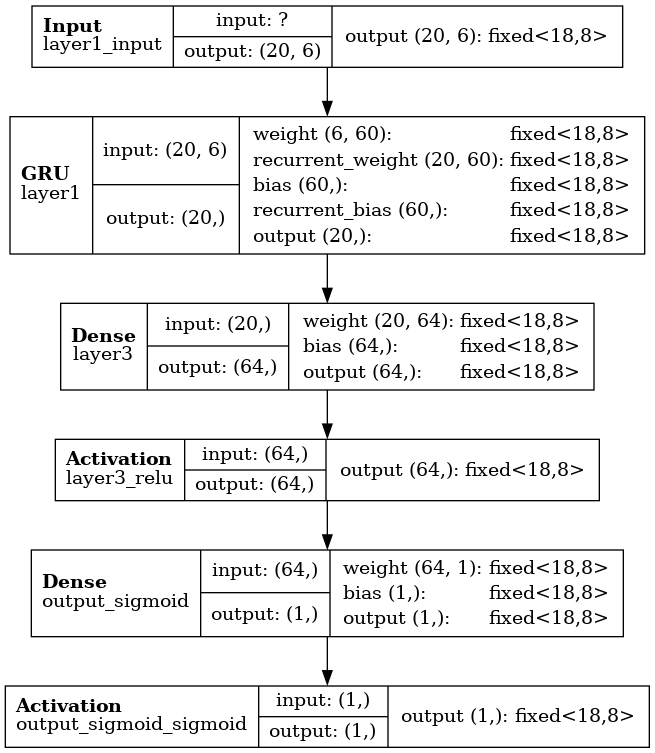

In [13]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [16]:
hls_model.compile()

Writing HLS project
Done


624/624 [==============================] - 2s 3ms/step


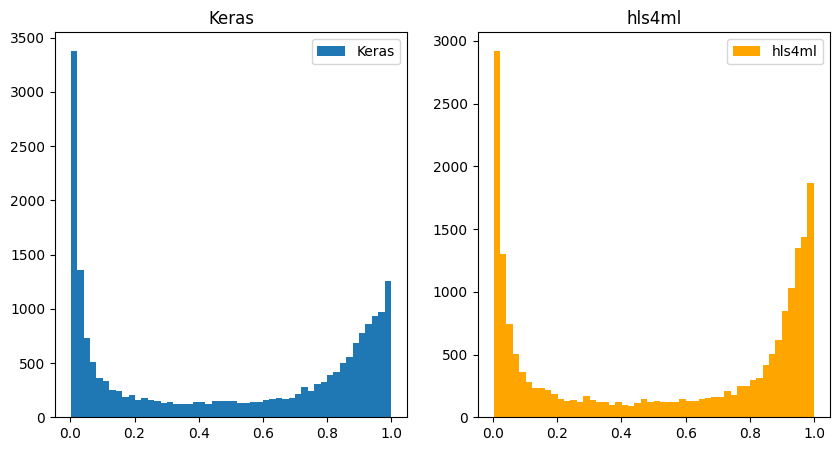

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x_test = np.load('data/x_test.npy')
y_test = np.load('data/y_test.npy')

y_keras = model.predict(x_test)
y_hls = hls_model.predict(x_test)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_keras, bins=50, label='Keras')
plt.title('Keras')
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(y_hls, bins=50, label='hls4ml', color='orange')
plt.title('hls4ml')
plt.legend()
plt.show()



In [9]:
hls_model.build(csim=False, synth=True, vsynth=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'jiuyal2' on host 'Duo16.' (Linux_x86_64 version 5.15.146.1-microsoft-standard-WSL2) on Wed Feb 28 00:38:08 PST 2024
INFO: [HLS 200-10] On os Ubuntu 18.04.6 LTS
INFO: [HLS 200-10] In directory '/home/jiuyal2/HLS4ML_VS_MANUAL/documents/Benchmarks/RNN/toptagging/hls/toptagging_gru_hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Creating and opening project '/home/jiuyal2/HLS4ML_VS_MANUAL/documents/Benchmarks/RNN/toptagging/hls/toptagging_gru_hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cp

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.273',
  'BestLatency': '226',
  'WorstLatency': '226',
  'IntervalMin': '222',
  'IntervalMax': '222',
  'BRAM_18K': '31',
  'DSP': '2448',
  'FF': '25922',
  'LUT': '93002',
  'URAM': '0',
  'AvailableBRAM_18K': '5376',
  'AvailableDSP': '12288',
  'AvailableFF': '3456000',
  'AvailableLUT': '1728000',
  'AvailableURAM': '1280'},
 'VivadoSynthReport': {'LUT': '55184',
  'FF': '24700',
  'BRAM_18K': '15.5',
  'URAM': '0',
  'DSP48E': '2438'}}